## Bayes Rule

In [0]:
# Prior Probability
p_infected = .005
# True Positive Rate
p_pos_infected = 1
# False Positive Rate
p_pos_not_infected = .01
# Complement Prior
p_not_infected = 1 - p_infected

numerator = p_pos_infected*p_infected

denominator = p_pos_infected*p_infected + p_pos_not_infected*p_not_infected

posterior_probability = numerator / denominator

print(posterior_probability)

In [0]:
def prob_drunk_given_pos(prior, true_positive, false_positive):
  numerator = true_positive*prior
  denominator = (true_positive*prior + false_positive*(1-prior))
  posterior = numerator / denominator
  return posterior
  
first_posterior = prob_drunk_given_pos(1/1000, 1, .08)

In [0]:
second_posterior = prob_drunk_given_pos(first_posterior, 1, .08)

0.13525210993291495

In [0]:
probabilities = []

prior = 1/1000
true_positive = 1
false_positive = .08

for test in range(1,11):
  prior = prob_drunk_given_pos(prior, true_positive, false_positive)
  probabilities.append(prior) 

probabilities

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192]

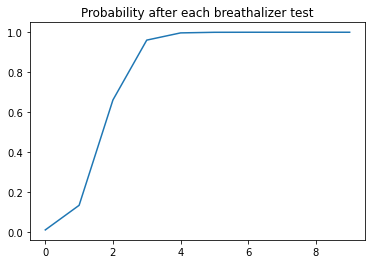

In [0]:
import matplotlib.pyplot as plt

plt.plot(probabilities)
plt.title("Probability after each breathalizer test")
plt.show()

## Bayesian and Frequentist Confidence Interval

In [0]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv", na_values=' ?')

print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df['age'].mean()

38.58164675532078

Average Age of Census Responders. I want to estimate the average age

In [0]:
sample = df.sample(1000)

In [0]:
sample['age'].mean()

37.828

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # pass extra parameter (ddof=1) to calculate **sample** standard deviation
  s = data.std(ddof=1)
  stderr = s / np.sqrt(n)
  # Lookup the t-statistic that corresponds to 95% area under the curve
  # for my given degrees of freedom: 49
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean - margin_of_error, mean, mean + margin_of_error)

In [0]:
frequentist = confidence_interval(sample['age'])
frequentist

(36.98462882101158, 37.828, 38.67137117898842)

In [0]:
bayesian, _, _ = stats.bayes_mvs(sample['age'], alpha=.95)
bayesian

Mean(statistic=37.828, minmax=(36.98462882101158, 38.67137117898842))

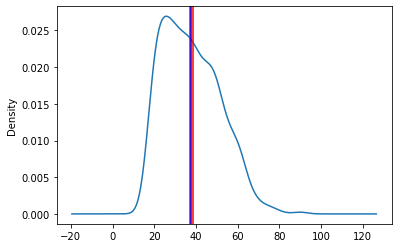

In [0]:
sample['age'].plot.density()
plt.axvline(frequentist[0], color='red')
plt.axvline(frequentist[1], color='blue')
plt.axvline(frequentist[2], color='red')
plt.show()

In [0]:
bayesian.statistic
bayesian.minmax[1]
bayesian.minmax[0]

bayesian.minmax[1] - bayesian.minmax[0]

1.68674235797684

In [0]:
(frequentist[2]-frequentist[1])

0.84337117898842

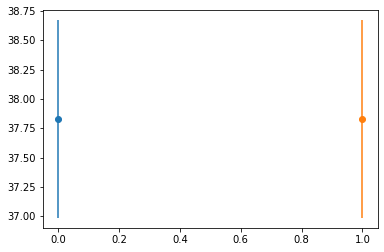

In [0]:
plt.errorbar(x=0, y=frequentist[1], yerr=(frequentist[2]-frequentist[1]), fmt='o')
plt.errorbar(x=1, y=bayesian.statistic, yerr=(bayesian.minmax[1]-bayesian.statistic), fmt='o')
plt.show()

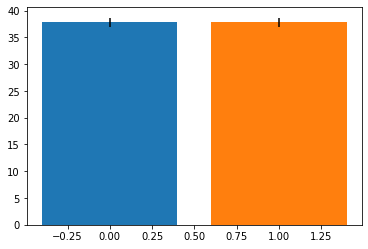

In [0]:
plt.bar(x=0, height=frequentist[1], yerr=(frequentist[2]-frequentist[1]))
plt.bar(x=1, height=bayesian.statistic, yerr=(bayesian.minmax[1]-bayesian.statistic))
plt.show()

## Using the votes dataset to show sample vs population

### (and show the relationship between confidence intervals and t-tests)

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-13 22:20:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-05-13 22:20:33 (126 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({'y': 1, 'n':0, '?': np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
df['crime'].mean()

0.5933014354066986

In [0]:
sample = df.sample(30)

sample['crime'].mean()

0.6

In [0]:
CI = confidence_interval(sample['crime'])

CI

(0.413941849155554, 0.6, 0.786058150844446)

## Relationship between a confidence interval and a 1-sample t-test

I hypothesize that congressional support for the "crime bill is 41.39%

My null hypothesis value is just outside of the confidence interval

In [0]:
stats.ttest_1samp(sample['crime'], .4139)

Ttest_1sampResult(statistic=2.0456896656954915, pvalue=0.049951801388068755)

If the null hypothesis value falls just **outside** of a confidence interval, then we will **reject** the null hypothesis. 

In [0]:
stats.ttest_1samp(sample['crime'], .414)

Ttest_1sampResult(statistic=2.0445904235323025, pvalue=0.05006704173165202)

If the null hypothesis value falls just **inside** of a confidence interval, then we will **fail to reject** the null hypothesis. 

In [0]:
sample['party'].value_counts()

democrat      18
republican    12
Name: party, dtype: int64

In [0]:
# Say that in the United States, 50% of the population is registered republicans and 50% is registered democrats.

12/18

0.6666666666666666

In [0]:
# Whenever a democrat votes in "favor" of a bill in my sample
# I will count their vote as 2/3s of a vote

# Or, I could count a republican vote in favor of a bill as 1.5x the number of votes

# Bootstrap method 